In [1]:
from datetime import datetime
from datetime import timedelta
from sportsreference.ncaab.boxscore import Boxscores
from sportsreference.ncaab.teams import Teams
import pandas as pd
import csv
import os
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait # available since 2.4.0
from selenium.webdriver.support import expected_conditions as EC # available since 2.26.0
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from csv import reader
from csv import writer
import time
path = os.getcwd()
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
def get_yesterday():
    today = datetime.today()
    yesterday = today - timedelta(days = 1)
    year = yesterday.year
    month = yesterday.month
    day = yesterday.day
    return year,month,day

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
kp = pd.read_csv('all.csv')
er = pd.read_csv('all_e.csv')

In [5]:
kp

,adj_def_x,adj_def_y,adj_off_x,adj_off_y,adj_tempo_x,adj_tempo_y,away,away_score,conf_x,conf_y,date,experience_x,experience_y,fg_def_x,fg_def_y,fg_off_x,fg_off_y,height_x,height_y,home,home_score,poss_def_x,poss_def_y,poss_off_x,poss_off_y,reb_def_x,reb_def_y,reb_off_x,reb_off_y,score,three_def_x,three_def_y,three_off_x,three_off_y,turnover_def_x,turnover_def_y,turnover_off_x,turnover_off_y,wins_five_x,wins_five_y,wins_last_x,wins_last_y
0,91.4,89.2,116.4,114.9,68.0,64.9,Wisconsin,54,B10,B10,2021-01-12,2.10,2.33,43.8,44.4,59.0,53.8,77.9,78.2,Michigan,77,17.6,18.0,16.6,18.1,24.1,21.9,31.1,23.7,23,34.8,33.0,35.8,41.4,15.2,18.2,18.2,12.1,5,4.0,1,1.0
1,92.3,89.5,109.8,112.7,71.7,68.7,Kansas,70,B12,B12,2021-01-12,1.12,1.42,46.8,47.2,51.3,49.9,77.6,78.2,Oklahoma St.,75,17.6,17.5,15.7,16.3,29.6,25.9,32.2,35.0,5,33.2,32.1,31.6,35.5,19.5,18.1,19.2,18.0,2,4.0,1,1.0
2,93.9,92.9,111.7,112.8,67.2,69.0,Duke,67,ACC,ACC,2021-01-12,1.63,0.90,48.8,52.2,53.0,52.7,76.3,76.9,Virginia Tech,74,18.0,16.8,17.7,16.4,23.0,24.9,31.8,35.3,7,33.8,37.1,35.3,35.2,18.6,21.8,17.9,20.0,4,4.0,1,1.0
3,91.1,93.0,107.7,111.6,68.0,74.6,Alabama,85,SEC,SEC,2021-01-12,0.90,1.93,45.9,47.4,47.2,49.4,79.0,77.9,Kentucky,65,18.0,17.5,17.0,14.2,30.4,29.2,33.8,32.8,-20,30.8,31.6,31.1,32.2,18.3,21.0,20.8,18.0,3,5.0,1,1.0
4,90.3,92.7,108.6,109.6,71.1,70.6,Syracuse,75,ACC,ACC,2021-01-12,1.08,1.49,48.7,46.3,46.1,51.3,78.8,77.9,North Carolina,81,17.7,17.0,15.8,15.3,23.7,28.0,40.7,29.6,6,34.7,29.8,30.4,32.6,18.8,22.8,22.0,17.5,3,4.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,99.0,105.8,88.4,86.3,69.6,68.2,Alabama A&M,35,SWAC,SWAC,2021-03-04,2.47,0.73,44.6,44.5,43.0,45.1,76.6,76.5,Jackson St.,50,16.8,16.5,16.7,17.6,26.7,29.4,29.4,28.9,15,32.7,27.5,31.5,28.3,21.7,18.0,22.4,21.3,5,0.0,1,0.0
1967,105.3,108.8,90.4,85.0,70.4,71.1,Alabama St.,68,SWAC,SWAC,2021-03-04,2.28,1.81,46.9,47.1,46.9,43.8,77.4,75.2,Grambling St.,91,16.8,17.0,16.6,15.8,31.7,29.8,24.8,30.0,23,34.2,30.1,32.2,31.9,21.0,21.3,21.8,22.0,2,1.0,0,0.0
1968,105.4,110.3,98.8,92.0,71.7,69.0,Alcorn St.,78,SWAC,SWAC,2021-03-04,2.54,2.19,47.2,56.0,48.0,44.3,77.8,74.9,Texas Southern,80,16.2,16.7,16.2,17.4,26.0,31.0,32.0,30.1,2,33.3,36.6,29.0,29.6,19.2,22.4,21.4,19.9,4,3.0,1,0.0
1969,96.5,110.3,98.4,94.6,70.7,71.7,Portland,86,WCC,WCC,2021-03-04,1.94,1.99,45.9,58.4,45.8,45.3,79.0,75.9,Santa Clara,95,17.8,16.0,15.6,17.0,25.0,30.7,22.9,17.6,9,30.5,37.1,28.9,32.5,16.8,17.8,18.4,19.2,0,0.0,0,0.0


In [6]:
er

,away,away_score,date,draft_kings,home,home_score,lasso,linear,predict_kp,rf,score
0,Wisconsin,54.0,2021-01-12,3.5,Michigan,77.0,-7.0,-8.0,1,-16.0,23.0
1,Kansas,70.0,2021-01-12,-3.5,Oklahoma St.,75.0,-3.0,-2.0,-1,-4.0,5.0
2,Duke,67.0,2021-01-12,-1.0,Virginia Tech,74.0,-6.0,-2.0,1,-6.0,7.0
3,Alabama,85.0,2021-01-12,3.0,Kentucky,65.0,1.0,2.0,1,-4.0,-20.0
4,Syracuse,75.0,2021-01-12,4.5,North Carolina,81.0,6.0,4.0,3,-4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
1855,Alabama St.,68.0,2021-03-04,8.0,Grambling St.,91.0,8.0,7.0,9,7.0,23.0
1856,Alcorn St.,78.0,2021-03-04,12.0,Texas Southern,80.0,10.0,14.0,10,11.0,2.0
1857,Morgan St.,NaN,2021-03-04,-11.0,Delaware St.,NaN,-9.0,-10.0,-11,-5.0,NaN
1858,Portland,86.0,2021-03-04,13.5,Santa Clara,95.0,13.0,16.0,13,11.0,9.0


In [7]:
er.drop(['away','home_score','away_score','score'], axis = 1, inplace = True)
df = pd.merge(er, kp, how='left', left_on=['home','date'], right_on=['home','date'])
df

,date,draft_kings,home,lasso,linear,predict_kp,rf,adj_def_x,adj_def_y,adj_off_x,adj_off_y,adj_tempo_x,adj_tempo_y,away,away_score,conf_x,conf_y,experience_x,experience_y,fg_def_x,fg_def_y,fg_off_x,fg_off_y,height_x,height_y,home_score,poss_def_x,poss_def_y,poss_off_x,poss_off_y,reb_def_x,reb_def_y,reb_off_x,reb_off_y,score,three_def_x,three_def_y,three_off_x,three_off_y,turnover_def_x,turnover_def_y,turnover_off_x,turnover_off_y,wins_five_x,wins_five_y,wins_last_x,wins_last_y
0,2021-01-12,3.5,Michigan,-7.0,-8.0,1,-16.0,91.4,89.2,116.4,114.9,68.0,64.9,Wisconsin,54.0,B10,B10,2.10,2.33,43.8,44.4,59.0,53.8,77.9,78.2,77.0,17.6,18.0,16.6,18.1,24.1,21.9,31.1,23.7,23.0,34.8,33.0,35.8,41.4,15.2,18.2,18.2,12.1,5.0,4.0,1.0,1.0
1,2021-01-12,-3.5,Oklahoma St.,-3.0,-2.0,-1,-4.0,92.3,89.5,109.8,112.7,71.7,68.7,Kansas,70.0,B12,B12,1.12,1.42,46.8,47.2,51.3,49.9,77.6,78.2,75.0,17.6,17.5,15.7,16.3,29.6,25.9,32.2,35.0,5.0,33.2,32.1,31.6,35.5,19.5,18.1,19.2,18.0,2.0,4.0,1.0,1.0
2,2021-01-12,-1.0,Virginia Tech,-6.0,-2.0,1,-6.0,93.9,92.9,111.7,112.8,67.2,69.0,Duke,67.0,ACC,ACC,1.63,0.90,48.8,52.2,53.0,52.7,76.3,76.9,74.0,18.0,16.8,17.7,16.4,23.0,24.9,31.8,35.3,7.0,33.8,37.1,35.3,35.2,18.6,21.8,17.9,20.0,4.0,4.0,1.0,1.0
3,2021-01-12,3.0,Kentucky,1.0,2.0,1,-4.0,91.1,93.0,107.7,111.6,68.0,74.6,Alabama,85.0,SEC,SEC,0.90,1.93,45.9,47.4,47.2,49.4,79.0,77.9,65.0,18.0,17.5,17.0,14.2,30.4,29.2,33.8,32.8,-20.0,30.8,31.6,31.1,32.2,18.3,21.0,20.8,18.0,3.0,5.0,1.0,1.0
4,2021-01-12,4.5,North Carolina,6.0,4.0,3,-4.0,90.3,92.7,108.6,109.6,71.1,70.6,Syracuse,75.0,ACC,ACC,1.08,1.49,48.7,46.3,46.1,51.3,78.8,77.9,81.0,17.7,17.0,15.8,15.3,23.7,28.0,40.7,29.6,6.0,34.7,29.8,30.4,32.6,18.8,22.8,22.0,17.5,3.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,2021-03-04,8.0,Grambling St.,8.0,7.0,9,7.0,105.3,108.8,90.4,85.0,70.4,71.1,Alabama St.,68.0,SWAC,SWAC,2.28,1.81,46.9,47.1,46.9,43.8,77.4,75.2,91.0,16.8,17.0,16.6,15.8,31.7,29.8,24.8,30.0,23.0,34.2,30.1,32.2,31.9,21.0,21.3,21.8,22.0,2.0,1.0,0.0,0.0
1856,2021-03-04,12.0,Texas Southern,10.0,14.0,10,11.0,105.4,110.3,98.8,92.0,71.7,69.0,Alcorn St.,78.0,SWAC,SWAC,2.54,2.19,47.2,56.0,48.0,44.3,77.8,74.9,80.0,16.2,16.7,16.2,17.4,26.0,31.0,32.0,30.1,2.0,33.3,36.6,29.0,29.6,19.2,22.4,21.4,19.9,4.0,3.0,1.0,0.0
1857,2021-03-04,-11.0,Delaware St.,-9.0,-10.0,-11,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1858,2021-03-04,13.5,Santa Clara,13.0,16.0,13,11.0,96.5,110.3,98.4,94.6,70.7,71.7,Portland,86.0,WCC,WCC,1.94,1.99,45.9,58.4,45.8,45.3,79.0,75.9,95.0,17.8,16.0,15.6,17.0,25.0,30.7,22.9,17.6,9.0,30.5,37.1,28.9,32.5,16.8,17.8,18.4,19.2,0.0,0.0,0.0,0.0


In [8]:
for index, row in df.iterrows():
    line = row['draft_kings']
    score = row['score']
    if score > line:
        win = 1
    elif score < line:
        win = 0
    else:
        win = 2
    
    
    df.loc[index,'cover'] = win

df = df[df['cover']!= 2]
df = df.reset_index(drop=True)
df

,date,draft_kings,home,lasso,linear,predict_kp,rf,adj_def_x,adj_def_y,adj_off_x,adj_off_y,adj_tempo_x,adj_tempo_y,away,away_score,conf_x,conf_y,experience_x,experience_y,fg_def_x,fg_def_y,fg_off_x,fg_off_y,height_x,height_y,home_score,poss_def_x,poss_def_y,poss_off_x,poss_off_y,reb_def_x,reb_def_y,reb_off_x,reb_off_y,score,three_def_x,three_def_y,three_off_x,three_off_y,turnover_def_x,turnover_def_y,turnover_off_x,turnover_off_y,wins_five_x,wins_five_y,wins_last_x,wins_last_y,cover
0,2021-01-12,3.5,Michigan,-7.0,-8.0,1,-16.0,91.4,89.2,116.4,114.9,68.0,64.9,Wisconsin,54.0,B10,B10,2.10,2.33,43.8,44.4,59.0,53.8,77.9,78.2,77.0,17.6,18.0,16.6,18.1,24.1,21.9,31.1,23.7,23.0,34.8,33.0,35.8,41.4,15.2,18.2,18.2,12.1,5.0,4.0,1.0,1.0,1.0
1,2021-01-12,-3.5,Oklahoma St.,-3.0,-2.0,-1,-4.0,92.3,89.5,109.8,112.7,71.7,68.7,Kansas,70.0,B12,B12,1.12,1.42,46.8,47.2,51.3,49.9,77.6,78.2,75.0,17.6,17.5,15.7,16.3,29.6,25.9,32.2,35.0,5.0,33.2,32.1,31.6,35.5,19.5,18.1,19.2,18.0,2.0,4.0,1.0,1.0,1.0
2,2021-01-12,-1.0,Virginia Tech,-6.0,-2.0,1,-6.0,93.9,92.9,111.7,112.8,67.2,69.0,Duke,67.0,ACC,ACC,1.63,0.90,48.8,52.2,53.0,52.7,76.3,76.9,74.0,18.0,16.8,17.7,16.4,23.0,24.9,31.8,35.3,7.0,33.8,37.1,35.3,35.2,18.6,21.8,17.9,20.0,4.0,4.0,1.0,1.0,1.0
3,2021-01-12,3.0,Kentucky,1.0,2.0,1,-4.0,91.1,93.0,107.7,111.6,68.0,74.6,Alabama,85.0,SEC,SEC,0.90,1.93,45.9,47.4,47.2,49.4,79.0,77.9,65.0,18.0,17.5,17.0,14.2,30.4,29.2,33.8,32.8,-20.0,30.8,31.6,31.1,32.2,18.3,21.0,20.8,18.0,3.0,5.0,1.0,1.0,0.0
4,2021-01-12,4.5,North Carolina,6.0,4.0,3,-4.0,90.3,92.7,108.6,109.6,71.1,70.6,Syracuse,75.0,ACC,ACC,1.08,1.49,48.7,46.3,46.1,51.3,78.8,77.9,81.0,17.7,17.0,15.8,15.3,23.7,28.0,40.7,29.6,6.0,34.7,29.8,30.4,32.6,18.8,22.8,22.0,17.5,3.0,4.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,2021-03-04,8.0,Jackson St.,8.0,7.0,9,9.0,99.0,105.8,88.4,86.3,69.6,68.2,Alabama A&M,35.0,SWAC,SWAC,2.47,0.73,44.6,44.5,43.0,45.1,76.6,76.5,50.0,16.8,16.5,16.7,17.6,26.7,29.4,29.4,28.9,15.0,32.7,27.5,31.5,28.3,21.7,18.0,22.4,21.3,5.0,0.0,1.0,0.0,1.0
1778,2021-03-04,8.0,Grambling St.,8.0,7.0,9,7.0,105.3,108.8,90.4,85.0,70.4,71.1,Alabama St.,68.0,SWAC,SWAC,2.28,1.81,46.9,47.1,46.9,43.8,77.4,75.2,91.0,16.8,17.0,16.6,15.8,31.7,29.8,24.8,30.0,23.0,34.2,30.1,32.2,31.9,21.0,21.3,21.8,22.0,2.0,1.0,0.0,0.0,1.0
1779,2021-03-04,12.0,Texas Southern,10.0,14.0,10,11.0,105.4,110.3,98.8,92.0,71.7,69.0,Alcorn St.,78.0,SWAC,SWAC,2.54,2.19,47.2,56.0,48.0,44.3,77.8,74.9,80.0,16.2,16.7,16.2,17.4,26.0,31.0,32.0,30.1,2.0,33.3,36.6,29.0,29.6,19.2,22.4,21.4,19.9,4.0,3.0,1.0,0.0,0.0
1780,2021-03-04,13.5,Santa Clara,13.0,16.0,13,11.0,96.5,110.3,98.4,94.6,70.7,71.7,Portland,86.0,WCC,WCC,1.94,1.99,45.9,58.4,45.8,45.3,79.0,75.9,95.0,17.8,16.0,15.6,17.0,25.0,30.7,22.9,17.6,9.0,30.5,37.1,28.9,32.5,16.8,17.8,18.4,19.2,0.0,0.0,0.0,0.0,0.0


In [9]:
x = df[['adj_off_x', 'adj_def_x','adj_tempo_x',
       'adj_off_y', 'adj_def_y','adj_tempo_y',  'draft_kings','predict_kp']].values
y = df[['cover']].values
#'adj_tempo_x' 'adj_tempo_x', 

In [10]:
from sklearn.model_selection import cross_val_score
from statistics import mean
clf = LogisticRegression()
#print(mean(cross_val_score(clf, x, y, cv=10)))

In [11]:
from sklearn.model_selection import cross_val_score
from statistics import mean
clf = RandomForestClassifier(n_estimators=10000)
print(mean(cross_val_score(clf, x, y, cv=10)))

In [12]:
def get_today():
    today = datetime.today()
    year = today.year
    month = today.month
    day = today.day
    return year,month,day
year,month,day = get_today()

In [13]:
path = os.getcwd()
name = path+"\\predict\\"+str(year)+"_"+str(month)+"_"+str(day)+"_predict.csv"
predict = pd.read_csv(name)
predict

,home,away,predict_kp,date,conf_x,adj_off_x,adj_def_x,adj_tempo_x,poss_off_x,poss_def_x,fg_off_x,fg_def_x,turnover_off_x,turnover_def_x,reb_off_x,reb_def_x,three_off_x,three_def_x,experience_x,height_x,wins_five_x,wins_last_x,conf_y,adj_off_y,adj_def_y,adj_tempo_y,poss_off_y,poss_def_y,fg_off_y,fg_def_y,turnover_off_y,turnover_def_y,reb_off_y,reb_def_y,three_off_y,three_def_y,experience_y,height_y,wins_five_y,wins_last_y
0,Nevada,Colorado St.,-2,2021-03-05,MWC,107.1,98.6,70.1,16.6,17.5,51.2,47.8,18.5,18.2,23.3,24.5,35.1,33.2,1.02,78.2,3,0,MWC,108.1,94.0,70.3,16.5,17.6,56.8,47.3,20.9,20.1,24.1,24.8,37.1,28.8,1.21,75.7,5,1
1,Buffalo,Kent St.,4,2021-03-05,MAC,107.9,95.7,74.7,14.8,17.0,51.3,46.1,17.9,18.1,36.8,26.5,32.7,28.0,2.20,77.1,4,1,MAC,107.7,97.9,70.2,17.5,16.7,51.5,48.6,19.2,17.2,35.3,28.2,34.2,34.8,2.15,77.5,4,1
2,VCU,Dayton,6,2021-03-05,A10,105.9,90.0,69.8,16.0,17.8,50.8,46.0,20.9,24.0,29.4,31.1,33.1,29.4,1.24,77.3,0,0,A10,109.1,97.7,66.1,18.6,17.5,55.7,47.9,21.0,17.4,23.1,29.0,37.3,31.7,1.91,77.8,0,0
3,Loyola Marymount,San Francisco,-1,2021-03-05,WCC,107.2,99.4,67.2,18.3,16.7,51.6,50.8,23.0,17.7,32.5,20.6,34.4,34.9,1.85,78.4,0,0,WCC,106.1,97.8,68.5,17.6,16.7,51.0,49.3,17.1,19.6,24.9,24.5,33.7,32.6,1.99,77.8,0,0
4,Saint Louis,Massachusetts,7,2021-03-05,A10,111.1,94.3,68.1,16.9,17.8,52.3,47.7,17.6,20.4,36.5,22.0,35.5,34.1,1.91,76.3,0,0,A10,106.1,98.8,72.1,16.5,16.4,50.1,50.8,16.7,20.1,25.2,24.3,32.8,33.7,1.02,76.9,0,0
5,Davidson,George Mason,5,2021-03-05,A10,113.1,100.1,62.9,19.3,18.5,55.4,49.4,17.3,15.7,27.6,21.2,35.0,34.0,1.75,78.4,0,0,A10,101.8,96.3,68.2,16.9,17.7,48.9,49.1,17.6,19.5,30.4,22.5,32.9,34.3,1.57,76.1,0,0
6,St. Bonaventure,Duquesne,8,2021-03-05,A10,110.3,92.3,65.3,18.6,18.3,50.5,46.1,17.2,19.7,33.0,28.7,36.5,30.8,1.93,77.3,0,0,A10,102.5,96.2,69.3,17.5,17.6,48.2,46.8,19.3,19.7,30.5,29.3,30.1,28.5,1.67,76.2,0,0
7,Miami FL,Boston College,1,2021-03-05,ACC,100.9,98.6,68.2,18.4,16.7,46.7,52.2,18.8,17.8,27.1,26.2,29.4,37.0,1.72,78.6,0,0,ACC,105.9,101.4,71.7,16.7,16.4,50.2,55.4,18.8,18.9,24.7,28.0,33.7,34.8,1.79,76.9,1,0
8,North Texas,UAB,7,2021-03-05,CUSA,106.8,92.9,64.4,18.5,17.1,55.9,46.5,21.3,21.1,27.2,25.4,37.5,31.9,2.34,76.9,4,0,CUSA,102.0,95.4,68.1,17.0,17.8,49.0,46.5,15.2,23.2,27.9,25.8,30.1,31.2,2.30,76.9,3,0
9,Pacific,Santa Clara,3,2021-03-05,WCC,103.0,97.2,67.2,18.3,17.2,47.4,51.0,16.5,18.6,27.4,24.3,29.9,34.9,2.21,76.9,0,0,WCC,99.5,98.2,70.6,15.5,17.9,47.1,46.8,18.4,16.8,23.2,24.8,30.2,32.0,1.94,79.0,0,0


In [14]:
name = path+"\\predict_scores\\"+str(year)+"_"+str(month)+"_"+str(day)+"_predict_scores.csv"
games = pd.read_csv(name)
games.drop(['away','predict_kp','date'], axis = 1, inplace = True)
df2 = pd.merge(predict, games, how='left', left_on=['home'], right_on=['home'])
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)
df2

,home,away,predict_kp,date,conf_x,adj_off_x,adj_def_x,adj_tempo_x,poss_off_x,poss_def_x,fg_off_x,fg_def_x,turnover_off_x,turnover_def_x,reb_off_x,reb_def_x,three_off_x,three_def_x,experience_x,height_x,wins_five_x,wins_last_x,conf_y,adj_off_y,adj_def_y,adj_tempo_y,poss_off_y,poss_def_y,fg_off_y,fg_def_y,turnover_off_y,turnover_def_y,reb_off_y,reb_def_y,three_off_y,three_def_y,experience_y,height_y,wins_five_y,wins_last_y,lasso,linear,rf,draft_kings
0,Nevada,Colorado St.,-2,2021-03-05,MWC,107.1,98.6,70.1,16.6,17.5,51.2,47.8,18.5,18.2,23.3,24.5,35.1,33.2,1.02,78.2,3,0,MWC,108.1,94.0,70.3,16.5,17.6,56.8,47.3,20.9,20.1,24.1,24.8,37.1,28.8,1.21,75.7,5,1,-1.0,1.0,-1.0,-1.0
1,Buffalo,Kent St.,4,2021-03-05,MAC,107.9,95.7,74.7,14.8,17.0,51.3,46.1,17.9,18.1,36.8,26.5,32.7,28.0,2.20,77.1,4,1,MAC,107.7,97.9,70.2,17.5,16.7,51.5,48.6,19.2,17.2,35.3,28.2,34.2,34.8,2.15,77.5,4,1,5.0,5.0,0.0,5.5
2,VCU,Dayton,6,2021-03-05,A10,105.9,90.0,69.8,16.0,17.8,50.8,46.0,20.9,24.0,29.4,31.1,33.1,29.4,1.24,77.3,0,0,A10,109.1,97.7,66.1,18.6,17.5,55.7,47.9,21.0,17.4,23.1,29.0,37.3,31.7,1.91,77.8,0,0,5.0,5.0,4.0,3.5
3,Loyola Marymount,San Francisco,-1,2021-03-05,WCC,107.2,99.4,67.2,18.3,16.7,51.6,50.8,23.0,17.7,32.5,20.6,34.4,34.9,1.85,78.4,0,0,WCC,106.1,97.8,68.5,17.6,16.7,51.0,49.3,17.1,19.6,24.9,24.5,33.7,32.6,1.99,77.8,0,0,3.0,3.0,2.0,-1.0
4,Saint Louis,Massachusetts,7,2021-03-05,A10,111.1,94.3,68.1,16.9,17.8,52.3,47.7,17.6,20.4,36.5,22.0,35.5,34.1,1.91,76.3,0,0,A10,106.1,98.8,72.1,16.5,16.4,50.1,50.8,16.7,20.1,25.2,24.3,32.8,33.7,1.02,76.9,0,0,10.0,9.0,10.0,7.5
5,Davidson,George Mason,5,2021-03-05,A10,113.1,100.1,62.9,19.3,18.5,55.4,49.4,17.3,15.7,27.6,21.2,35.0,34.0,1.75,78.4,0,0,A10,101.8,96.3,68.2,16.9,17.7,48.9,49.1,17.6,19.5,30.4,22.5,32.9,34.3,1.57,76.1,0,0,8.0,6.0,10.0,5.5
6,Miami FL,Boston College,1,2021-03-05,ACC,100.9,98.6,68.2,18.4,16.7,46.7,52.2,18.8,17.8,27.1,26.2,29.4,37.0,1.72,78.6,0,0,ACC,105.9,101.4,71.7,16.7,16.4,50.2,55.4,18.8,18.9,24.7,28.0,33.7,34.8,1.79,76.9,1,0,1.0,1.0,-0.0,3.5
7,North Texas,UAB,7,2021-03-05,CUSA,106.8,92.9,64.4,18.5,17.1,55.9,46.5,21.3,21.1,27.2,25.4,37.5,31.9,2.34,76.9,4,0,CUSA,102.0,95.4,68.1,17.0,17.8,49.0,46.5,15.2,23.2,27.9,25.8,30.1,31.2,2.30,76.9,3,0,7.0,6.0,7.0,5.5
8,Pacific,Santa Clara,3,2021-03-05,WCC,103.0,97.2,67.2,18.3,17.2,47.4,51.0,16.5,18.6,27.4,24.3,29.9,34.9,2.21,76.9,0,0,WCC,99.5,98.2,70.6,15.5,17.9,47.1,46.8,18.4,16.8,23.2,24.8,30.2,32.0,1.94,79.0,0,0,6.0,4.0,3.0,3.0
9,Belmont,Jacksonville St.,5,2021-03-05,OVC,110.2,100.4,71.2,15.7,17.4,56.7,48.8,16.5,20.4,26.2,26.3,34.9,33.9,1.37,76.9,0,0,OVC,106.0,104.8,66.1,18.4,16.8,52.6,48.1,19.7,15.5,32.0,28.0,35.0,32.7,2.18,77.1,0,0,8.0,8.0,2.0,7.5


In [15]:
predict_x = df2[['adj_off_x', 'adj_def_x', 'adj_tempo_x', 
       'adj_off_y', 'adj_def_y', 'adj_tempo_y', 'draft_kings','predict_kp']].values

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf.fit(x,y)
y_pred_prob = clf.predict_proba(predict_x)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [18]:
y_pred = clf.predict(predict_x)

In [19]:
df2.drop([ 'conf_x', 'adj_off_x',
       'adj_def_x', 'adj_tempo_x', 'poss_off_x', 'poss_def_x', 'fg_off_x',
       'fg_def_x', 'turnover_off_x', 'turnover_def_x', 'reb_off_x',
       'reb_def_x', 'three_off_x', 'three_def_x', 'experience_x', 'height_x',
       'wins_five_x', 'wins_last_x', 'conf_y', 'adj_off_y', 'adj_def_y',
       'adj_tempo_y', 'poss_off_y', 'poss_def_y', 'fg_off_y', 'fg_def_y',
       'turnover_off_y', 'turnover_def_y', 'reb_off_y', 'reb_def_y',
       'three_off_y', 'three_def_y', 'experience_y', 'height_y', 'wins_five_y',
       'wins_last_y','lasso','linear','rf'], axis = 1, inplace = True)
df2

,home,away,predict_kp,date,draft_kings
0,Nevada,Colorado St.,-2,2021-03-05,-1.0
1,Buffalo,Kent St.,4,2021-03-05,5.5
2,VCU,Dayton,6,2021-03-05,3.5
3,Loyola Marymount,San Francisco,-1,2021-03-05,-1.0
4,Saint Louis,Massachusetts,7,2021-03-05,7.5
5,Davidson,George Mason,5,2021-03-05,5.5
6,Miami FL,Boston College,1,2021-03-05,3.5
7,North Texas,UAB,7,2021-03-05,5.5
8,Pacific,Santa Clara,3,2021-03-05,3.0
9,Belmont,Jacksonville St.,5,2021-03-05,7.5


In [20]:
df2['home_cover'] = y_pred
df2 = df2.reset_index(drop=True)
df2

,home,away,predict_kp,date,draft_kings,home_cover
0,Nevada,Colorado St.,-2,2021-03-05,-1.0,1.0
1,Buffalo,Kent St.,4,2021-03-05,5.5,0.0
2,VCU,Dayton,6,2021-03-05,3.5,1.0
3,Loyola Marymount,San Francisco,-1,2021-03-05,-1.0,0.0
4,Saint Louis,Massachusetts,7,2021-03-05,7.5,0.0
5,Davidson,George Mason,5,2021-03-05,5.5,1.0
6,Miami FL,Boston College,1,2021-03-05,3.5,1.0
7,North Texas,UAB,7,2021-03-05,5.5,1.0
8,Pacific,Santa Clara,3,2021-03-05,3.0,0.0
9,Belmont,Jacksonville St.,5,2021-03-05,7.5,0.0


In [21]:
for index, row in df2.iterrows():
    hc = row['home_cover']
    if hc == 0:
        df2.loc[index,'percent_chance'] = y_pred_prob[index][0]
    else:
        df2.loc[index,'percent_chance'] = y_pred_prob[index][1]
df2 = df2.sort_values(by=['percent_chance'], ascending = False)
df2

,home,away,predict_kp,date,draft_kings,home_cover,percent_chance
35,Manhattan,Fairfield,5,2021-03-05,5.0,1.0,0.7728
28,Siena,Canisius,6,2021-03-05,6.0,1.0,0.7717
9,Belmont,Jacksonville St.,5,2021-03-05,7.5,0.0,0.7529
1,Buffalo,Kent St.,4,2021-03-05,5.5,0.0,0.7496
21,UC San Diego,Cal St. Fullerton,4,2021-03-05,3.0,0.0,0.7160
36,Loyola Chicago,Southern Illinois,16,2021-03-05,15.5,0.0,0.7104
30,Grand Canyon,Utah Valley,9,2021-03-05,9.0,1.0,0.6989
42,Mississippi Valley St.,Arkansas Pine Bluff,-9,2021-03-05,-10.0,1.0,0.6624
40,Eastern Washington,Idaho St.,12,2021-03-05,12.0,0.0,0.6554
16,UC Davis,Hawaii,1,2021-03-05,3.0,0.0,0.6542


In [22]:
for index, row in df2.iterrows():
    hc = row['home_cover']
    if hc == 0:
        df2.loc[index,'bet'] = row['away']
    else:
        df2.loc[index,'bet'] = row['home']
df2

,home,away,predict_kp,date,draft_kings,home_cover,percent_chance,bet
35,Manhattan,Fairfield,5,2021-03-05,5.0,1.0,0.7728,Manhattan
28,Siena,Canisius,6,2021-03-05,6.0,1.0,0.7717,Siena
9,Belmont,Jacksonville St.,5,2021-03-05,7.5,0.0,0.7529,Jacksonville St.
1,Buffalo,Kent St.,4,2021-03-05,5.5,0.0,0.7496,Kent St.
21,UC San Diego,Cal St. Fullerton,4,2021-03-05,3.0,0.0,0.7160,Cal St. Fullerton
36,Loyola Chicago,Southern Illinois,16,2021-03-05,15.5,0.0,0.7104,Southern Illinois
30,Grand Canyon,Utah Valley,9,2021-03-05,9.0,1.0,0.6989,Grand Canyon
42,Mississippi Valley St.,Arkansas Pine Bluff,-9,2021-03-05,-10.0,1.0,0.6624,Mississippi Valley St.
40,Eastern Washington,Idaho St.,12,2021-03-05,12.0,0.0,0.6554,Idaho St.
16,UC Davis,Hawaii,1,2021-03-05,3.0,0.0,0.6542,Hawaii


In [23]:
df2[df2['percent_chance'] > .8]

,home,away,predict_kp,date,draft_kings,home_cover,percent_chance,bet


In [24]:
df2[df2['away'] == 'Illinois']

,home,away,predict_kp,date,draft_kings,home_cover,percent_chance,bet


In [25]:
df2.head(10)

,home,away,predict_kp,date,draft_kings,home_cover,percent_chance,bet
35,Manhattan,Fairfield,5,2021-03-05,5.0,1.0,0.7728,Manhattan
28,Siena,Canisius,6,2021-03-05,6.0,1.0,0.7717,Siena
9,Belmont,Jacksonville St.,5,2021-03-05,7.5,0.0,0.7529,Jacksonville St.
1,Buffalo,Kent St.,4,2021-03-05,5.5,0.0,0.7496,Kent St.
21,UC San Diego,Cal St. Fullerton,4,2021-03-05,3.0,0.0,0.7160,Cal St. Fullerton
36,Loyola Chicago,Southern Illinois,16,2021-03-05,15.5,0.0,0.7104,Southern Illinois
30,Grand Canyon,Utah Valley,9,2021-03-05,9.0,1.0,0.6989,Grand Canyon
42,Mississippi Valley St.,Arkansas Pine Bluff,-9,2021-03-05,-10.0,1.0,0.6624,Mississippi Valley St.
40,Eastern Washington,Idaho St.,12,2021-03-05,12.0,0.0,0.6554,Idaho St.
16,UC Davis,Hawaii,1,2021-03-05,3.0,0.0,0.6542,Hawaii


In [26]:
year,month,day = get_today()
name = path+"\\lr_predict\\"+str(year)+"_"+str(month)+"_"+str(day)+"_lr_predict.csv"
df2.to_csv(name, index = False)

In [27]:
#error

In [28]:
year,month,day = get_yesterday()
name = path+"\\lr_predict\\"+str(year)+"_"+str(month)+"_"+str(day)+"_lr_predict.csv"
df2 = pd.read_csv(name)

In [29]:
year,month,day = get_yesterday()
name = path+"\\scores_kenpom\\"+str(year)+"_"+str(month)+"_"+str(day)+"_scores_kenpom.csv"
scores = pd.read_csv(name)

In [30]:
error =  pd.merge(df2, scores, how='left', left_on=['home','date'], right_on=['home','date'])

In [31]:
error.drop([ 'conf_x', 'adj_off_x',
       'adj_def_x', 'adj_tempo_x', 'poss_off_x', 'poss_def_x', 'fg_off_x',
       'fg_def_x', 'turnover_off_x', 'turnover_def_x', 'reb_off_x',
       'reb_def_x', 'three_off_x', 'three_def_x', 'experience_x', 'height_x',
       'wins_five_x', 'wins_last_x', 'conf_y', 'adj_off_y', 'adj_def_y',
       'adj_tempo_y', 'poss_off_y', 'poss_def_y', 'fg_off_y', 'fg_def_y',
       'turnover_off_y', 'turnover_def_y', 'reb_off_y', 'reb_def_y',
       'three_off_y', 'three_def_y', 'experience_y', 'height_y', 'wins_five_y',
       'wins_last_y','home_score','away_score'], axis = 1, inplace = True)
error

,home,away_x,predict_kp,date,draft_kings,home_cover,percent_chance,bet,away_y,score
0,Radford,Campbell,2,2021-03-04,1.0,0.0,0.7490,Campbell,Campbell,-18.0
1,Grambling St.,Alabama St.,9,2021-03-04,8.0,0.0,0.7209,Alabama St.,Alabama St.,23.0
2,Oklahoma,Texas,1,2021-03-04,2.0,1.0,0.6785,Oklahoma,Texas,-4.0
3,Texas Tech,Iowa St.,17,2021-03-04,17.0,1.0,0.6677,Texas Tech,Iowa St.,27.0
4,Lipscomb,Florida Gulf Coast,3,2021-03-04,5.0,1.0,0.6577,Lipscomb,Florida Gulf Coast,-12.0
5,Utah St.,Wyoming,15,2021-03-04,16.0,1.0,0.6423,Utah St.,Wyoming,13.0
6,Weber St.,Northern Colorado,11,2021-03-04,9.5,1.0,0.6395,Weber St.,Northern Colorado,1.0
7,Portland St.,Southern Utah,-2,2021-03-04,-2.5,0.0,0.6196,Southern Utah,Southern Utah,-10.0
8,North Florida,North Alabama,2,2021-03-04,3.0,1.0,0.6162,North Florida,North Alabama,-8.0
9,Massachusetts,Saint Joseph's,5,2021-03-04,4.0,0.0,0.6144,Saint Joseph's,Saint Joseph's,34.0


In [32]:
year,month,day = get_yesterday()
name = path+"\\error_lr\\"+str(year)+"_"+str(month)+"_"+str(day)+"_error_lr.csv"
error.to_csv(name, index = False)

In [33]:
er = pd.read_csv('error_lr_all.csv')
er.to_csv('error_lr_all_copy.csv', index = False)
frames = [er,error]
new = pd.concat(frames, ignore_index = True)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [34]:
new.to_csv('error_lr_all.csv', index = False)
error = new

In [35]:
er = pd.read_csv('error_lr_all.csv')
error = er

In [36]:
for index, row in error.iterrows():
    line = row['draft_kings']
    score = row['score']
    hc = row['home_cover']
    if score > line and hc == 1:
        win = 1
    elif score < line and hc == 0:
        win = 1
    elif score == line:
        win = 2
    else:
        win = 0
    
    
    error.loc[index,'win'] = win
error

,away_x,away_y,bet,date,draft_kings,home,home_cover,lasso,linear,percent_chance,predict_kp,rf,score,win
0,Charlotte,Charlotte,Charlotte,2021-01-23,1.5,Florida Atlantic,0.0,NaN,NaN,0.8817,1,NaN,-3.0,1.0
1,Idaho St.,Idaho St.,Idaho St.,2021-01-23,2.5,Portland St.,0.0,NaN,NaN,0.8489,-1,NaN,26.0,0.0
2,Pittsburgh,Pittsburgh,Wake Forest,2021-01-23,-1.5,Wake Forest,1.0,NaN,NaN,0.8431,-4,NaN,1.0,1.0
3,Rice,Rice,UAB,2021-01-23,9.5,UAB,1.0,NaN,NaN,0.8309,10,NaN,12.0,1.0
4,Kansas,Kansas,Oklahoma,2021-01-23,-1.0,Oklahoma,1.0,NaN,NaN,0.8264,1,NaN,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,Fairfield,Fairfield,Manhattan,2021-03-04,4.5,Manhattan,1.0,NaN,NaN,0.5141,5,NaN,10.0,1.0
1515,Michigan St.,Michigan St.,Michigan St.,2021-03-04,12.0,Michigan,0.0,NaN,NaN,0.5098,15,NaN,19.0,0.0
1516,Kennesaw St.,Kennesaw St.,Liberty,2021-03-04,16.5,Liberty,1.0,NaN,NaN,0.5086,18,NaN,10.0,0.0
1517,Vanderbilt,Vanderbilt,Vanderbilt,2021-03-04,6.5,Cincinnati,0.0,NaN,NaN,0.5026,2,NaN,-14.0,1.0


In [37]:
error.dropna(subset=['score'], inplace = True)

In [38]:
error['win'].value_counts(sort = True)

0.0    742
1.0    709
2.0     22
Name: win, dtype: int64

In [39]:
test = error[error['percent_chance']  > .8]
test['win'].value_counts(sort = True)

1.0    24
0.0    12
Name: win, dtype: int64

In [40]:
test = error[(error['percent_chance']  <= .8)  &   (error['percent_chance']  > .75)]
test['win'].value_counts(sort = True)

1.0    28
0.0    22
2.0     3
Name: win, dtype: int64

In [41]:
yesterday = error[error['date'] == '2021-03-04']

In [42]:
yesterday

,away_x,away_y,bet,date,draft_kings,home,home_cover,lasso,linear,percent_chance,predict_kp,rf,score,win
1483,Campbell,Campbell,Campbell,2021-03-04,1.0,Radford,0.0,NaN,NaN,0.7490,2,NaN,-18.0,1.0
1484,Alabama St.,Alabama St.,Alabama St.,2021-03-04,8.0,Grambling St.,0.0,NaN,NaN,0.7209,9,NaN,23.0,0.0
1485,Texas,Texas,Oklahoma,2021-03-04,2.0,Oklahoma,1.0,NaN,NaN,0.6785,1,NaN,-4.0,0.0
1486,Iowa St.,Iowa St.,Texas Tech,2021-03-04,17.0,Texas Tech,1.0,NaN,NaN,0.6677,17,NaN,27.0,1.0
1487,Florida Gulf Coast,Florida Gulf Coast,Lipscomb,2021-03-04,5.0,Lipscomb,1.0,NaN,NaN,0.6577,3,NaN,-12.0,0.0
1488,Wyoming,Wyoming,Utah St.,2021-03-04,16.0,Utah St.,1.0,NaN,NaN,0.6423,15,NaN,13.0,0.0
1489,Northern Colorado,Northern Colorado,Weber St.,2021-03-04,9.5,Weber St.,1.0,NaN,NaN,0.6395,11,NaN,1.0,0.0
1490,Southern Utah,Southern Utah,Southern Utah,2021-03-04,-2.5,Portland St.,0.0,NaN,NaN,0.6196,-2,NaN,-10.0,1.0
1491,North Alabama,North Alabama,North Florida,2021-03-04,3.0,North Florida,1.0,NaN,NaN,0.6162,2,NaN,-8.0,0.0
1492,Saint Joseph's,Saint Joseph's,Saint Joseph's,2021-03-04,4.0,Massachusetts,0.0,NaN,NaN,0.6144,5,NaN,34.0,0.0


In [43]:
yesterday['win'].value_counts(sort = True)

0.0    20
1.0    15
Name: win, dtype: int64

In [44]:
test = yesterday[yesterday['percent_chance'] > .8]
test['win'].value_counts(sort = True)

Series([], Name: win, dtype: int64)

In [45]:
test = yesterday[(yesterday['percent_chance']  <= .8)  &   (yesterday['percent_chance']  > .75)]
test['win'].value_counts(sort = True)

Series([], Name: win, dtype: int64)

In [46]:
test = error[(error['percent_chance']  >= .5)  &    (error['percent_chance']  <.6 ) ]
test

,away_x,away_y,bet,date,draft_kings,home,home_cover,lasso,linear,percent_chance,predict_kp,rf,score,win
64,Tennessee Martin,Tennessee Martin,Morehead St.,2021-01-23,12.0,Morehead St.,1.0,NaN,NaN,0.5966,13,NaN,32.0,1.0
65,Northwestern St.,Northwestern St.,Southeastern Louisiana,2021-01-23,1.0,Southeastern Louisiana,1.0,NaN,NaN,0.5965,1,NaN,-5.0,0.0
66,N.C. State,N.C. State,North Carolina,2021-01-23,6.0,North Carolina,1.0,NaN,NaN,0.5947,5,NaN,10.0,1.0
67,Akron,Akron,Western Michigan,2021-01-23,-7.5,Western Michigan,1.0,NaN,NaN,0.5936,-7,NaN,-11.0,0.0
68,VMI,VMI,Mercer,2021-01-23,9.0,Mercer,1.0,NaN,NaN,0.5926,7,NaN,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,Fairfield,Fairfield,Manhattan,2021-03-04,4.5,Manhattan,1.0,NaN,NaN,0.5141,5,NaN,10.0,1.0
1515,Michigan St.,Michigan St.,Michigan St.,2021-03-04,12.0,Michigan,0.0,NaN,NaN,0.5098,15,NaN,19.0,0.0
1516,Kennesaw St.,Kennesaw St.,Liberty,2021-03-04,16.5,Liberty,1.0,NaN,NaN,0.5086,18,NaN,10.0,0.0
1517,Vanderbilt,Vanderbilt,Vanderbilt,2021-03-04,6.5,Cincinnati,0.0,NaN,NaN,0.5026,2,NaN,-14.0,1.0


In [47]:
win_percentage = []
test = error[(error['percent_chance']  >= .5)  &    (error['percent_chance']  <.55)  ]
win_percentage.append(test['win'].value_counts(sort = False)[1]/(test['win'].value_counts(sort = False)[1]+test['win'].value_counts(sort = False)[0]))
test = error[(error['percent_chance']  >= .55)  &    (error['percent_chance']  <.6)  ]
win_percentage.append(test['win'].value_counts(sort = False)[1]/(test['win'].value_counts(sort = False)[1]+test['win'].value_counts(sort = False)[0]))
test = error[(error['percent_chance']  >= .6)  &    (error['percent_chance']  <.65)  ]
win_percentage.append(test['win'].value_counts(sort = False)[1]/(test['win'].value_counts(sort = False)[1]+test['win'].value_counts(sort = False)[0]))
test = error[(error['percent_chance']  >= .65)  &    (error['percent_chance']  <.7)  ]
win_percentage.append(test['win'].value_counts(sort = False)[1]/(test['win'].value_counts(sort = False)[1]+test['win'].value_counts(sort = False)[0]))
test = error[(error['percent_chance']  >= .7)  &    (error['percent_chance']  <.75)  ]
win_percentage.append(test['win'].value_counts(sort = False)[1]/(test['win'].value_counts(sort = False)[1]+test['win'].value_counts(sort = False)[0]))
test = error[(error['percent_chance']  >= .75 ) &    (error['percent_chance']  <.8)  ]
win_percentage.append(test['win'].value_counts(sort = False)[1]/(test['win'].value_counts(sort = False)[1]+test['win'].value_counts(sort = False)[0]))
test = error[error['percent_chance']  > .8  ]
win_percentage.append(test['win'].value_counts(sort = False)[1]/(test['win'].value_counts(sort = False)[1]+test['win'].value_counts(sort = False)[0]))                     

In [48]:
win_percentage

[0.5195402298850574,
 0.4793650793650794,
 0.4647887323943662,
 0.4028436018957346,
 0.525,
 0.5510204081632653,
 0.6666666666666666]

In [49]:
import matplotlib.pyplot as plt

In [50]:
index = [".5-.55",".55-,6",".6-.65",".65-.7",".7-.75",".75-.8",".8 up"]
index

['.5-.55', '.55-,6', '.6-.65', '.65-.7', '.7-.75', '.75-.8', '.8 up']

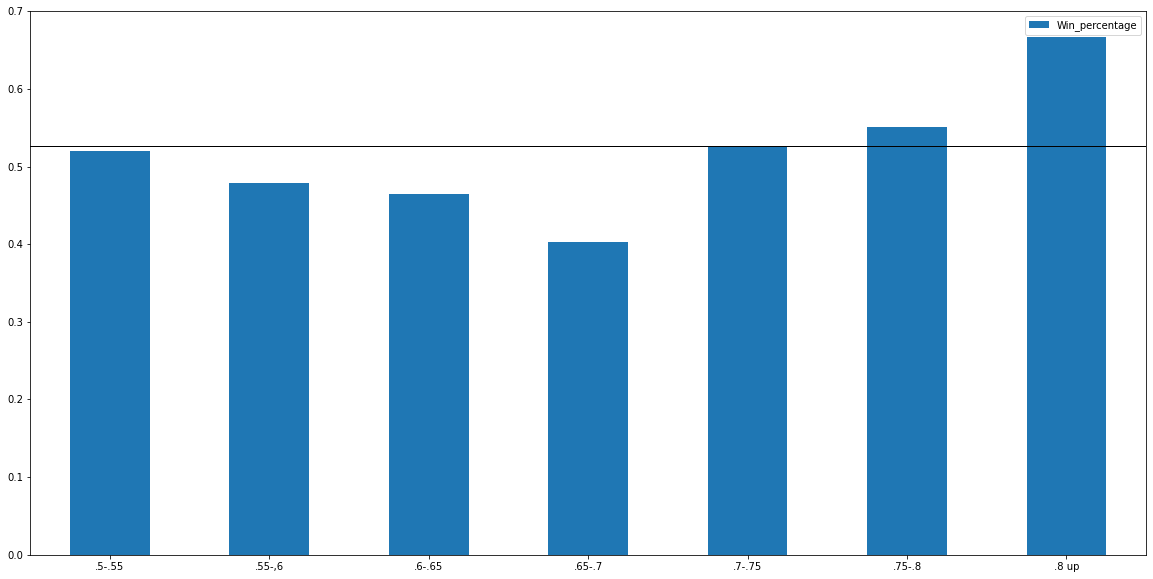

In [51]:
plot = pd.DataFrame({'Win_percentage': win_percentage}, index=index)
ax = plot.plot.bar(rot=0, figsize=(20,10))
plt.axhline(y=.52632,linewidth=1, color='k')